# mini-project II: Mount Saint Helens' biodiversity after the ashes
Elements of Data Science

In [ ]:
# Enter your name as a string
name = ...

In [52]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Mount Saint Helens Eruption  8:32 A.M. on May 18, 1980
We will explore data on ecosystem recovery following the volcanic eruption at Mount Saint Helens in Washington State.<br>
<img src='data/Eruption.jpg'><br><img src='data/800px-1980_St._Helens_ashmap.png'>

### <font color='green'>Data Sets
<font color='red'>**Mount Saint Helens erupted at 8:32 A.M. on May 18, 1980.** </font>
<br>
Professor Roger del Morales at University of Washington https://faculty.washington.edu/moral/ and his team set up circular, 9 meter radius, land plots near the volcano once it was safe to initiate the study in 1984. These plots are located in several distinct regions near the volcano cone to study the return of vegetation and biodiversity to these plots located in different positions relative to the volcanic cone (see mapping below). We will use this data to assess the rate of plant succession. Measures in the data include yearly species richness, *RICHNESS*, defined as the number of species in a given region or in this case the 9 meter radius (250 m^2) land plot. We will use our data science tools to decide if the changes over time in *RICHNESS* are a pattern (Alternate hypothesis) or if they are just due to random fluctuations (NULL hypothesis). We will also study *COVER_%*, a measure that reflects plant coverage. In this case we will test whether growth has occured following the eruption. Plots are studied in 13 unique locations with different characteristics including the blast type which they experienced. In designing their study, the researchers also collected data in up to 10 adjacent plots with the same name in order to assess statistical variation across an area. 

**Our Overall Study Plan**
1. Select two distinct plot names with contrasting characteristics
2. Look at plant succcesion 10 years after the blast relative to first year of data available for a given plot. Here we use a paired t-test.
3. Examine time trend for plant succession using changes function developed in Lab 07.

**Data collected:**
1. del Moral, Roger (2016): Thirty years of permanent vegetation plots, Mount St. Helens, Washington, USA. Wiley. Collection. https://doi.org/10.6084/m9.figshare.c.3303093.v1 
Source: https://figshare.com/collections/Thirty_years_of_permanent_vegetation_plots_Mount_St_Helens_Washington_USA/3303093

**Papers using this data:**
1. Del Moral, R.; Magnússon, B., "Surtsey and Mount St. Helens: a comparison of early succession rates". Biogeosciences 2014, 11 (7), 2099-2111.
https://faculty.washington.edu/moral/publications/2014%20delMoral%20Magnusson.pdf

2.  Cook, James E.; Halpern, Charles B., "Vegetation changes in blown-down and scorched forests 10–26 years after the eruption of Mount St. Helens, Washington, USA". Plant Ecology 2018, 219 (8), 957-972.
https://link.springer.com/content/pdf/10.1007/s11258-018-0849-8.pdf



### <font color='green'>Video background

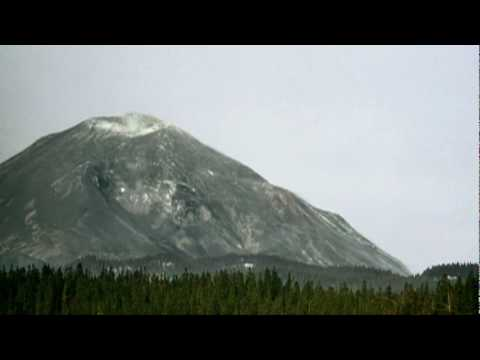

In [51]:
from IPython.display import YouTubeVideo
YouTubeVideo("UK--hvgP2uY")
# https://youtu.be/UK--hvgP2uY

### <font color='green'> ***Question 1***</font>
We will first explore the different study plots where data was collected. They are located in different environments, elevations, and locations relative to the volcano cone. Create initial data tables and plots to explore the nature of the different plots included in "data/MSH_PLOT_DESCRIPTORS2.csv". Variables to consider include elevation, slope, aspect (direction), impact type. You could use group or pivot methods here.

In [ ]:
# Plot description dataset
datafile = "data/MSH_PLOT_DESCRIPTORS2.csv"
MSH_PLOT = Table.read_table(datafile)
MSH_PLOT

#### Plot Impact Type

In [ ]:
np.unique(MSH_PLOT['IMPACT_TYPE'])

#### Mapping Biodiversity Data Collected following Mount Saint Helens Eruption
Data is collected anually on developing biodiversity on defined plots of land with given latitude and longitude. These locations can be mapped using the *map_table* method of a table object.  Plots are studied in 13 unique locations relative to the volcanic cone with different characteristics including the blast type which they experienced. Zoom in on map, click on each circle to view the label for the data series. There are replicate plots within each plot name in order assess statistical variation.

In [ ]:
MSH_PLOT = MSH_PLOT.with_columns('NLONG',-1*(MSH_PLOT.column('LONG')))
MSH_map = MSH_PLOT.select('LAT', 'NLONG', 'PLOT_CODE').relabel('PLOT_CODE', 'labels')
Circle.map_table(MSH_map, color='blue',area=200)

### <font color='green'> ***Question 2***</font>
Identify two plots with unique `PLOT_NAME`'s to study based on mapped location and characteristics given in "data/MSH_PLOT_DESCRIPTORS2.csv" file. Use a detailed markdown cell to provide reasons for your two choices of plots. Include differences and similarities.

In [ ]:
# Plot vegatation trend yearly dataset
datafile = "data/MSH_STRUCTURE_PLOT_YEAR.csv"
MSH_YEAR = Table.read_table(datafile)
MSH_YEAR

**Unique plot names**

In [ ]:
np.unique(MSH_YEAR.column('PLOT_NAME')) #Return unique plot names

In [ ]:
np.unique(MSH_YEAR.column('YEAR')) #Return unique plot years

**Select Plots**
Example exploratory data analysis below. Select from unique plot names above with complete justification for choice.

In [ ]:
myplot1 = '...'

In [ ]:
# Select a particular plot name based on examination of mapped data and descriptions in the plot description dataset.
PLT = 'STRD' # Put the name for study hear, i.e ='STRD'
data = MSH_YEAR.where('PLOT_NAME',are.contained_in(PLT)).sort('YEAR',descending=False)
data

In [ ]:
data.scatter('YEAR','RICHNESS')

Group and average to get better view of time trend.

In [ ]:
data.group('YEAR', np.mean).plot('YEAR','RICHNESS mean')

In [ ]:
data.stats()

In [ ]:
def five_num_sum(table,column):
    nums=[]
    array = table.column(column)
    nums.append(np.min(array))
    nums.append(np.max(array))
    nums.append(np.mean(array))
    nums.append(np.median(array))
    nums.append(np.std(array))
    print(f'min: {nums[0]} \nmax: {nums[1]} \nmean: {nums[2]:.3f} \nmedian: {nums[3]:.3f} \nstd: {nums[4]:.3f}')
    return nums

In [ ]:
five_num_sum(data,'RICHNESS')

### <font color='green'> ***Question 3***</font>
- Formulate a hypothesis regarding plant vegetation (*COVER_%*) and variety (*RICHNESS*) following the eruption. You can refer to the above links and papers for ideas. Create a detailed markdown cell to detail this hypothesis.
- State the NULL hypothesis for each measure.
<br>Use below markdown cells

<font color='blue'>***COVER_% Hypothesis with support***

<font color='blue'>***RICHNESS Hypothesis with support***

<font color='blue'>***COVER_% NULL Hypothesis***

<font color='blue'>***RICHNESS NULL Hypothesis***

### <font color='green'> ***Question 4***</font>
Consider the change in COVER_% between the first year of your data and 15 years after the 1980 volcanic eruption. We will use the multiple data points at each year for each plot to perform a difference of means. Use the paired t-test as in lab 07 to test your hypothesis regarding COVER_%

In [ ]:
data['YEAR'].min() # Using example plot

In [ ]:
np.mean(data.where('YEAR',1995)['COVER_%'])

In [ ]:
np.mean(data.where('YEAR',1984)['COVER_%'])

In [ ]:
diff_means = np.mean(data.where('YEAR',1995)['COVER_%'])-np.mean(data.where('YEAR',1984)['COVER_%'])
diff_means

In [ ]:
s1 = np.std(data.where('YEAR',1984)['COVER_%'])
s2 = np.std(data.where('YEAR',1995)['COVER_%'])
s = np.sqrt((s1**2 + s2**2) / 2)
dof = 2 * data.num_rows - 2

mean_diff = np.mean(data.where('YEAR',1995)['COVER_%'])-np.mean(data.where('YEAR',1984)['COVER_%'])

n = data.num_rows
se1 = s1/np.sqrt(n)
se2 = s2/np.sqrt(n)
std_error =  np.sqrt((se1**2+se2**2)/2)

print(f'The mean temperature change is: {mean_diff:.2f}')
print(f'The standard deviation of the temperature differences is: {s:.3f}')
print(f'The standard error is: {std_error:.4f}')
print(f'The degrees of freedom is: {dof}')

In [ ]:
t = ...
print("The t value is:", t)

<font color='blue'>***Find the p-value, accept or reject null hypothesis?***</font>
The p-value is the probability that the observed temperature increases are random. So do we accept or reject the null hypothesis? Explain in the cell below the check of the p-value.

## Part 2: Testing a trend

### <font color='green'> ***Question 5***</font>
Now we will look at the time trend of COVER_% and RICHNESS using the `changes` function you developed and used  in Part 2 of Lab 07. With `changes` we are looking at the number of increases minus decreases over the time period.

`changes` function:

In [ ]:
def diff_n(values, n):
    '''
    Parameters:
    values is an array of numbers
    n is the offset (how far apart the numbers are in the array)
    '''
    return np.array(values)[n:] - np.array(values)[:-n]

In [ ]:
def changes(array, years = 1):
    "Return the number of increases minus the number of decreases"
    ...

In [ ]:
test_stat = ...
print('Total increases minus total decreases, across all years:', test_stat)

### <font color='green'> ***Question 6***</font>
Carry out 1000 simulations. Statistically test whether data supports the alternate hypothesis
    1. Compute a P-value. (Hint: you can use np.count_nonzero())
    2. Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses.
    3. Describe your findings using simple, non-technical language.

### <font color='green'> ***Question 7: Conclusions***</font>
Summarize your conclusions from your study of two plots. Contrast the features of the two plots and how they might lead to different or similar conclusions in the magnitude and significance of the studied quantities, COVER_% or RICHNESS. Use a markdown Table to summarize part of your conclusions. A markdown table uses `|` to divide headings and `|---|` to draw lines between rows.

|Plot|Hypothesis|Support|
|---|---|---|

### <font color='green'> ***Question 8***</font>
- What techniques did you use from Lab 07?
- What part was the msot challenging?
- How long did you spend on the lab?
- What did you learn from this 2nd mini-project?

In [ ]:
# Last cell to execute
import datetime
now = datetime.datetime.now()
now = now.strftime('%H:%M:%S on %A, %B the %dth, %Y')
print(" Submitted by ", name, " at ", now )